In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')

In [3]:
df.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


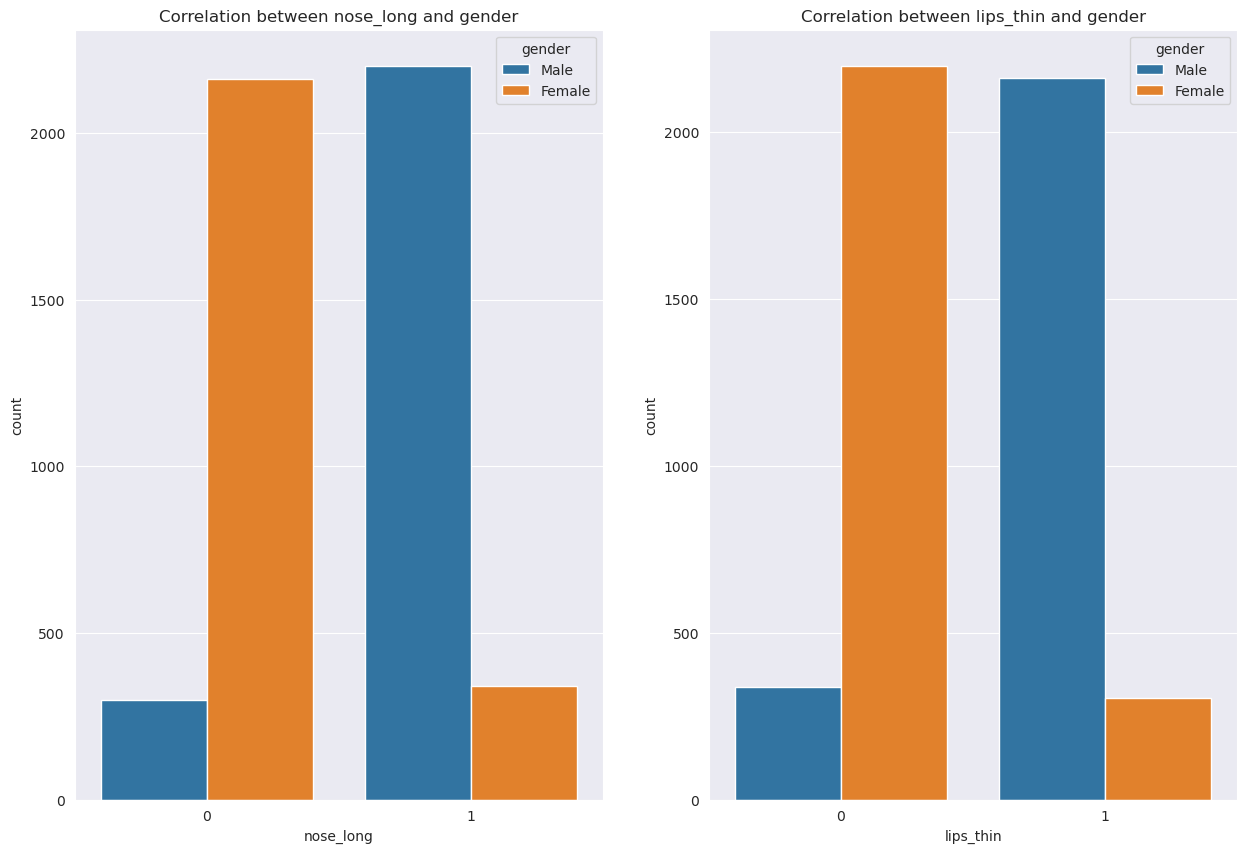

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))
sns.countplot(data = df,x = 'nose_long', hue = 'gender', ax = ax[0])
ax[0].set_title('Correlation between nose_long and gender')
sns.countplot(data = df,x = 'lips_thin', hue = 'gender', ax = ax[1])
ax[1].set_title('Correlation between lips_thin and gender')
plt.show()

# Con trai thì hầu như có mũi dài hơn con gái và thường môi mỏng hơn con gái

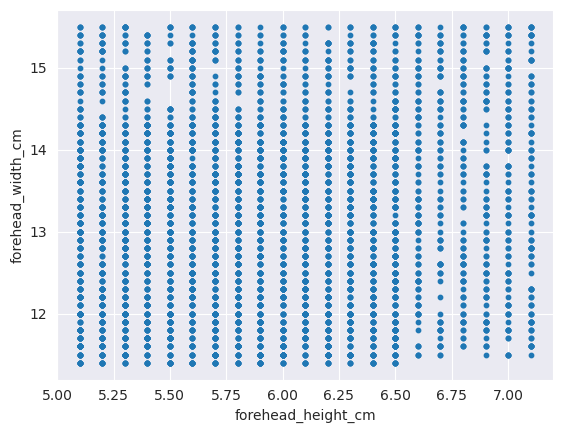

In [43]:
plt.scatter(y = df['forehead_width_cm'], x  = df['forehead_height_cm'], s = 10)
plt.xlabel('forehead_height_cm')
plt.ylabel('forehead_width_cm')
plt.show()

**2 giá trị là trán rộng và trán cao hầu như không có mối tương quan gì cả**

/tmp/ipykernel_29/3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

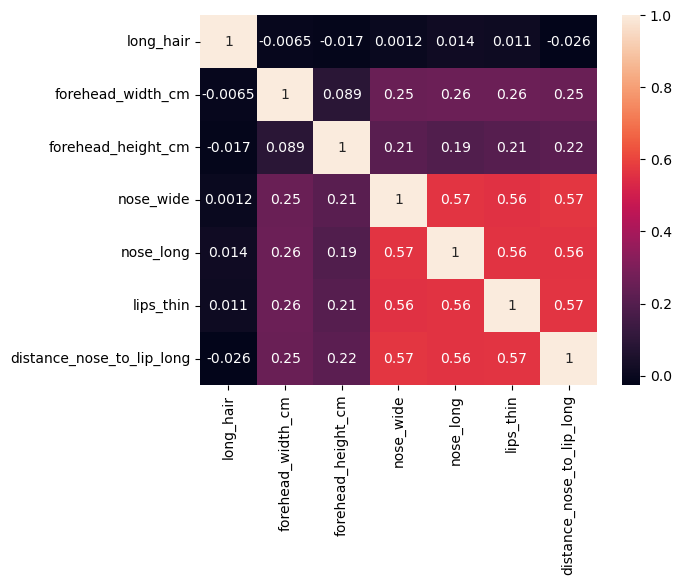

In [17]:
sns.heatmap(df.corr(), annot = True)

(array([2500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2501.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

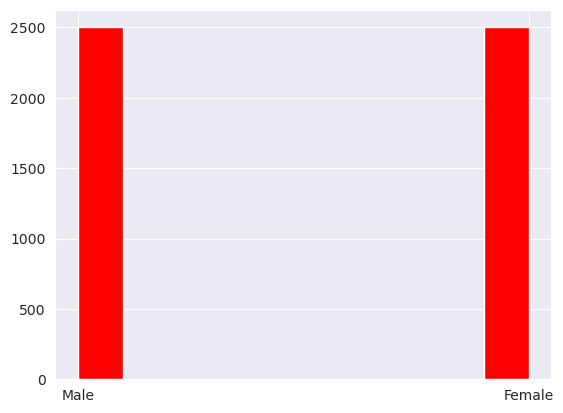

In [47]:
colors = ['red']
plt.hist(df['gender'], color = colors)

# **Balance Dataset**

# One hot Encoding gender

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [74]:

X = df.loc[:,:'distance_nose_to_lip_long']
y = df['gender']

In [84]:
data_encoded = pd.get_dummies(data = df, columns=['gender'])

In [85]:
data_encoded.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Female,gender_Male
0,1,11.8,6.1,1,0,1,1,0,1
1,0,14.0,5.4,0,0,1,0,1,0
2,0,11.8,6.3,1,1,1,1,0,1
3,0,14.4,6.1,0,1,1,1,0,1
4,1,13.5,5.9,0,0,0,0,1,0


In [87]:
data_encoded.drop(data_encoded['gender_Female'], inplace = True)

# Rename column, with 1 : Male, 0: Female

In [89]:
data_encoded.rename(columns = {'gender_Male':'gender'}, inplace = True)

In [106]:
X = data_encoded.loc[:,:'distance_nose_to_lip_long']
y = data_encoded['gender']

In [107]:
data_encoded.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Female,gender
2,0,11.8,6.3,1,1,1,1,0,1
3,0,14.4,6.1,0,1,1,1,0,1
4,1,13.5,5.9,0,0,0,0,1,0
5,1,13.0,6.8,1,1,1,1,0,1
6,1,15.3,6.2,1,1,1,0,0,1


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [109]:
X_train,x_test,Y_train,y_test = train_test_split(X, y, random_state = 42, test_size= 0.8)

In [110]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [111]:
# make predictions on the test data
y_pred = tree.predict(x_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95325


Draw ROC Curve

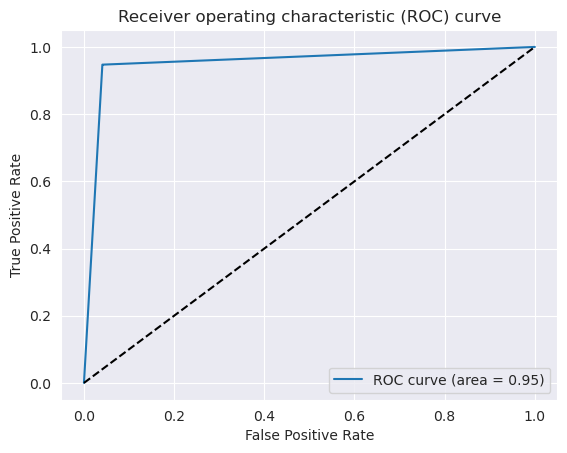

In [112]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# compute the predicted probabilities
y_pred_prob = tree.predict_proba(x_test)[:, 1]

# compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log = LogisticRegression()
log.fit(X_train, Y_train)
y_pred = log.predict(x_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96925


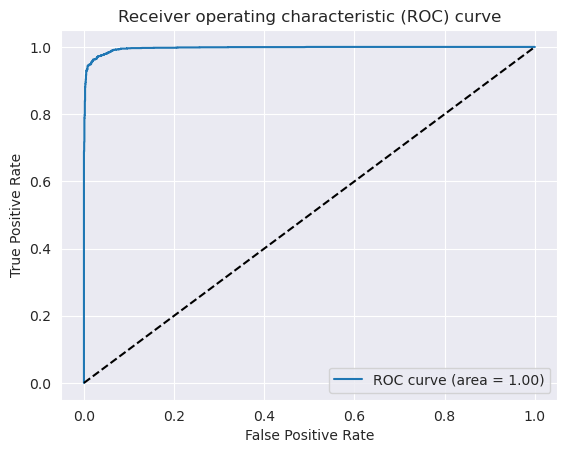

In [115]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# compute the predicted probabilities
y_pred_prob = log.predict_proba(x_test)[:, 1]

# compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()